<a href="https://colab.research.google.com/github/Kim-Cheomji/-/blob/main/%EC%A4%91%EA%B0%84%EA%B3%A0%EC%82%AC_%EA%B5%AC%EC%A7%84%EB%AA%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##3-1 데이터셋
데이콘에서 와인 품질 분류 경진대회 데이터 다운로드

SyntaxError: ignored

In [ ]:
##3-2 데이터셋 설명, 변수설명


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import plot_roc_curve,accuracy_score, confusion_matrix, plot_confusion_matrix

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/와인/train.csv')
test = pd.read_csv('/content/drive/MyDrive/와인/test.csv')

In [ ]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [ ]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [ ]:
train.info()
train.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4159
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918,NaN
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524,NaN
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000,NaN
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000,NaN
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,NaN
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000,NaN


In [ ]:
train= train.drop(['index'],axis=1)
train.head(5)

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


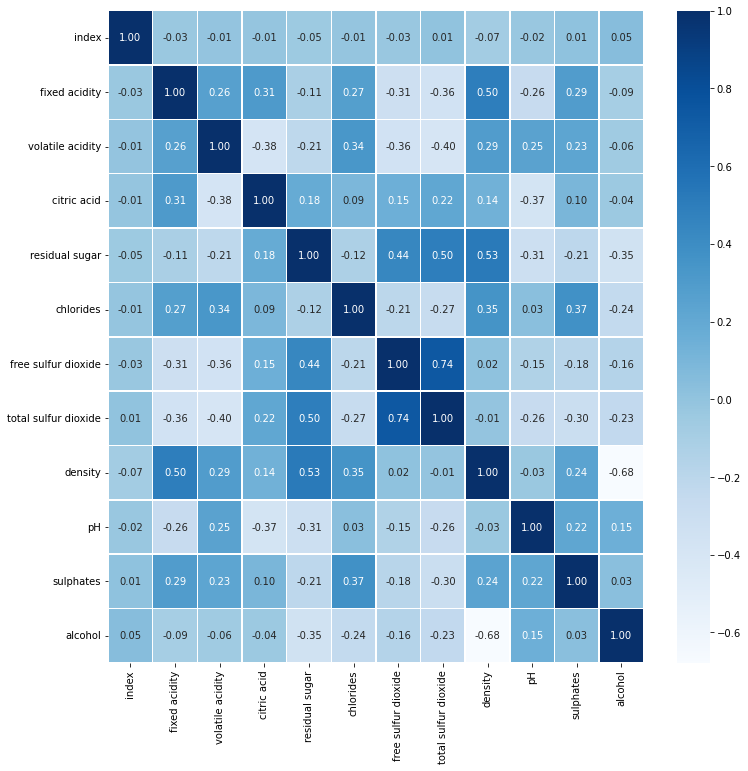

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data = test.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

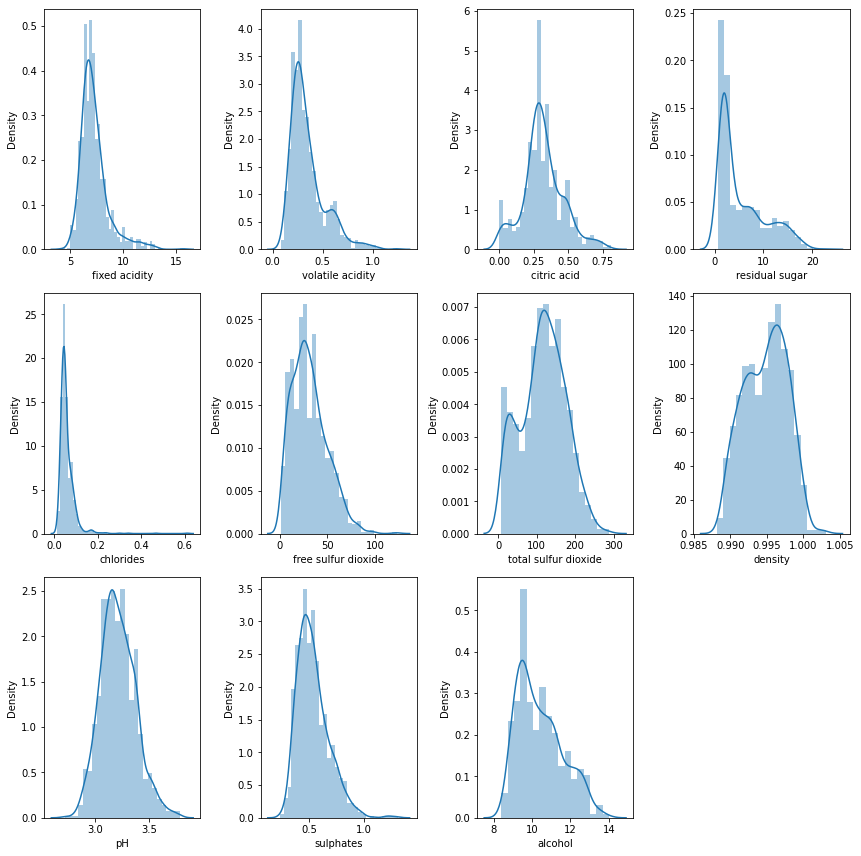

In [ ]:
plt.figure(figsize=(12,12))
for i in range(1,12):
    plt.subplot(3,4,i)
    sns.distplot(test.iloc[:,i])
plt.tight_layout()
plt.show()

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64


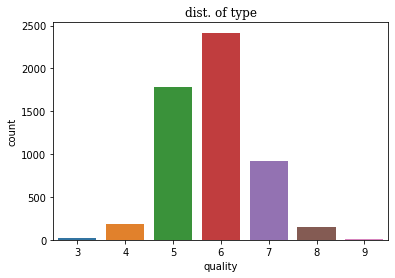

In [ ]:
print(train['quality'].value_counts())
sns.countplot(x=train['quality']);
plt.title("dist. of type", fontfamily='serif',fontsize=12);

In [ ]:
numerical_columns = train.select_dtypes(exclude='object').columns.tolist()
numerical_columns.remove('quality')


scaler= StandardScaler()
train[numerical_columns] = scaler.fit_transform(train[numerical_columns])



train['type'] = pd.factorize(train['type'])[0]

train.head(3)

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,-1.250611,2.186377,-1.78194,0.286345,-0.398500,-1.211937,-0.560852,-0.117252,1.372128,-0.605988,-0.255287,0
1,5,1.234899,1.665574,-1.23056,-0.638755,0.322998,-1.155351,-1.307080,0.738864,-0.183584,0.398147,-0.841348,1
2,5,0.535849,-0.785265,0.49250,-0.722855,0.034399,-0.532907,0.398583,-0.966732,-1.054782,-0.070450,0.330774,0


In [ ]:
X = train.drop(['quality'],axis=1)
Y = train.quality



In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=42)


In [ ]:
X_train.shape, X_test.shape

((3847, 12), (1650, 12))

In [ ]:
def Model(model):
    model.fit(X_train,Y_train)
    score = model.score(X_test,Y_test)
    model_train_score= model.score(X_train,Y_train)
    model_test_score=model.score(X_test,Y_test)
    prediction = model.predict(X_test)
    cm = confusion_matrix(Y_test, prediction)
    print("Testing Score\n", score)
    plot_confusion_matrix(model,X_test,Y_test,cmap='OrRd')

Testing Score
 0.6527272727272727
[0.07493254 0.10105284 0.07900194 0.08548998 0.08858159 0.08549686
 0.08991165 0.10197839 0.08155591 0.08776198 0.12088706 0.00334926]


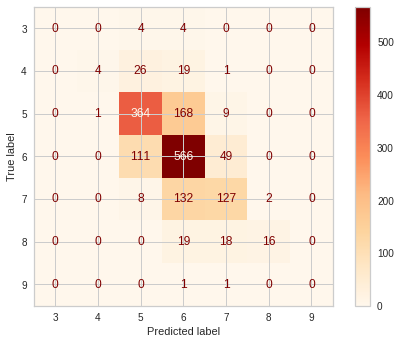

In [ ]:
rf= RandomForestClassifier()
rf.fit(X_train,Y_train)
Model(rf)
print(rf.feature_importances_)# 각 피쳐에 대한 중요도

accuracy:0.641
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.33      0.10      0.15        50
           5       0.60      0.63      0.61       542
           6       0.55      0.63      0.58       726
           7       0.42      0.33      0.37       269
           8       0.11      0.02      0.03        53
           9       0.00      0.00      0.00         2

    accuracy                           0.54      1650
   macro avg       0.29      0.24      0.25      1650
weighted avg       0.52      0.54      0.52      1650

Testing Score
 0.5418181818181819


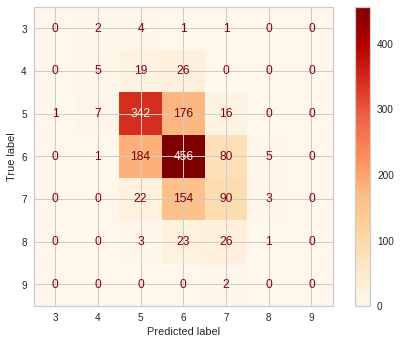

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=9, metric="euclidean")

from sklearn.metrics import classification_report
knn_model.fit(X_train,Y_train)
Y_pred=knn_model.predict(X_test)
print("accuracy:{:.3f}".format(knn_model.score(X_train,Y_train)))
print(classification_report(Y_test, Y_pred))
Model(knn_model)

accuracy:0.899
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.33      0.02      0.04        50
           5       0.72      0.63      0.67       542
           6       0.57      0.79      0.66       726
           7       0.62      0.38      0.47       269
           8       1.00      0.19      0.32        53
           9       0.00      0.00      0.00         2

    accuracy                           0.62      1650
   macro avg       0.46      0.29      0.31      1650
weighted avg       0.63      0.62      0.60      1650

Testing Score
 0.6206060606060606


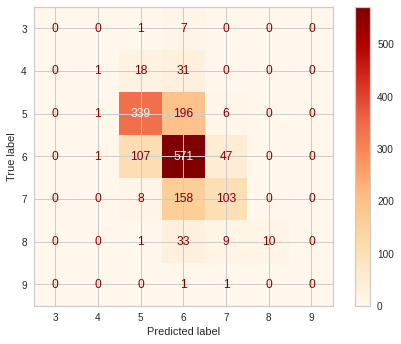

In [ ]:
from sklearn.svm import SVC

SVC_model=SVC(C=1, gamma=1, random_state=0)
SVC_model.fit(X_train, Y_train)
Y_pred=SVC_model.predict(X_test)
print("accuracy:{:.3f}".format(SVC_model.score(X_train,Y_train)))
print(classification_report(Y_test, Y_pred))
Model(SVC_model)

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
 !pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
